<a href="https://colab.research.google.com/github/MinahilRaza/Image_Analysis_Project1/blob/main/Feature_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir images

In [ ]:
import numpy as np
import cv2 as cv
import os
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
from sklearn import svm
from skimage.feature import hog
from skimage import data, exposure

## Auxiliary Functions

In [ ]:
def display_image(img, width = 15, height= 15, sub_plots= (1,1)):
  fig, axs = plt.subplots(sub_plots[0], sub_plots[1])
  fig.set_figwidth(width)
  fig.set_figheight(height)
  if  sub_plots== (1,1):
    image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    axs.imshow(image)
  else:
    for n,ax in enumerate(axs.flatten()):
        image1 = cv.cvtColor(img[n], cv.COLOR_BGR2RGB)
        ax.imshow(image1)
  plt.show()

In [ ]:
def visualize_bounding_boxes(image, boxes, format = 1):
  # boxes is a list/array of bounding boxes
  # if format = 1: box is in format (x,y,w,h)
  frame = image.copy()
  for box in boxes:
      if format == 1:
        (x, y, w, h) = box  
        x1, y1 = x+w, y+h
      else:
        (x, y, x1, y1) = box
      cv.rectangle(frame, (x, y), (x1, y1), (0, 0, 255), 2)
  display_image(frame)

## Analyze Labels

Read labels from csv file

In [ ]:
labels = pd.read_csv("labels.csv")
background = pd.read_csv("background.csv")
labels.head()

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,person,1285,1008,33,72,10.jpg,1920,1080
1,person,1588,922,35,116,10.jpg,1920,1080
2,person,1658,758,39,101,10.jpg,1920,1080
3,person,1715,784,31,74,10.jpg,1920,1080
4,person,1754,769,22,88,10.jpg,1920,1080


Plot labels across images

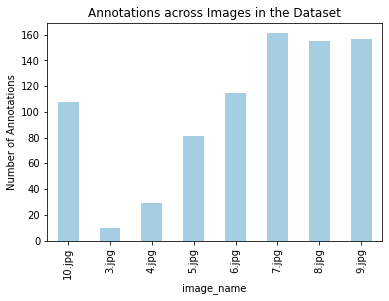

In [ ]:
ax = labels.groupby('image_name')["label_name"].count().plot(kind= 'bar', title="Annotations across Images in the Dataset",stacked=True, colormap='Paired');
ax.set_ylabel("Number of Annotations");

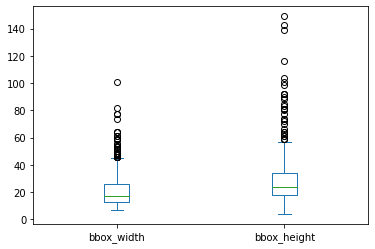

In [ ]:
labels[['bbox_width' , 'bbox_height']].plot(kind = "box")

In [ ]:
labels[['bbox_width' , 'bbox_height']].max()

bbox_width     101
bbox_height    149
dtype: int64

In [ ]:
labels[['bbox_width' , 'bbox_height']].min()

bbox_width     7
bbox_height    4
dtype: int64

Therefore, based on these plots, I would discard the boxes which have a width greater than 120 and height greater than 160. similarly, boxes with area less than 20 would be discarded

In [ ]:
num_images = 10
img_path = "./images/"
# read all frames and store in an array
frames = []
for i in range(num_images):
  path = img_path + str(i+1) + '.jpg'
  print(path)
  frame = cv.imread(path)
  frames.append(frame) 

./images/1.jpg
./images/2.jpg
./images/3.jpg
./images/4.jpg
./images/5.jpg
./images/6.jpg
./images/7.jpg
./images/8.jpg
./images/9.jpg
./images/10.jpg


### Region of Interest
Let's visualize labels across one image
As you can see from the image, I am only considering people on the shore. This is because in majority of my images, I had people only in 

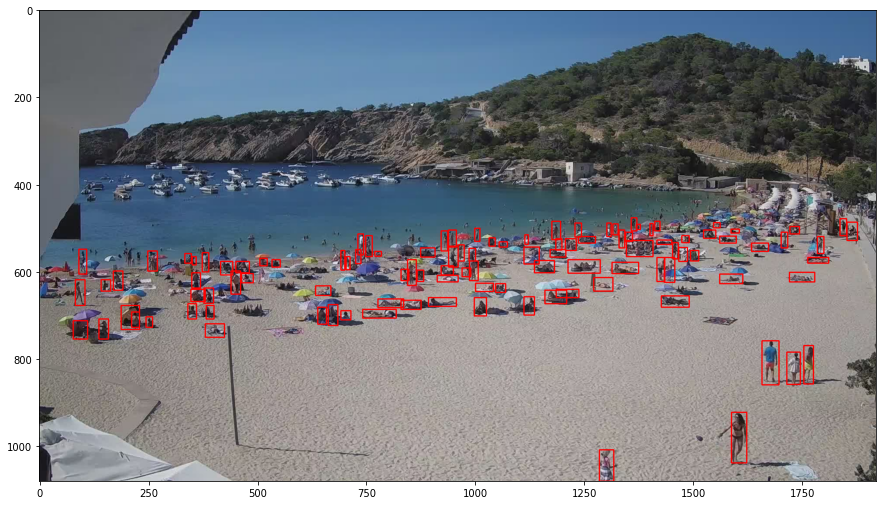

In [ ]:
boxes = labels[labels.image_name == '10.jpg'][['bbox_x', 'bbox_y', 'bbox_width' , 'bbox_height']].to_numpy()
visualize_bounding_boxes(frames[9], boxes, format = 1)

In [ ]:
def pad(A, shape):
   out = np.zeros(shape)
   out[tuple(slice(0, d) for d in np.shape(A))] = A
   return out

In [ ]:
# image labels
boxes = labels[labels.image_name == '10.jpg'][['bbox_x', 'bbox_y', 'bbox_width' , 'bbox_height']].to_numpy()
# image need to be grayscale
frame = cv.cvtColor(frames[9], cv.COLOR_BGR2GRAY)
patch_shape = (150, 120)
patches = []
# take a crop and pad with zeros to get patches of same shape
for box in boxes:
  (x, y, w, h) = box
  w1 = patch_shape[0]- w
  w1 = int(w/2)
  h1 = patch_shape[1]- h
  h1 = int(h/2)
  image_box = frame[y:y+h, x:x+w]
  image_box = pad(image_box, patch_shape)
  patches.append(image_box.astype('uint8'))

In [ ]:
boxes = background[background.image_name == '10.jpg'][['bbox_x', 'bbox_y', 'bbox_width' , 'bbox_height']].to_numpy()
patches_bg = []
# take a crop and pad with zeros to get patches of same shape
for box in boxes:
  (x, y, w, h) = box
  w1 = patch_shape[0]- w
  w1 = int(w/2)
  h1 = patch_shape[1]- h
  h1 = int(h/2)
  image_box = frame[y:y+h, x:x+w]
  image_box = pad(image_box, patch_shape)
  patches_bg.append(image_box.astype('uint8'))

boxes = background[background.image_name == '1.jpg'][['bbox_x', 'bbox_y', 'bbox_width' , 'bbox_height']].to_numpy()
frame = cv.cvtColor(frames[0], cv.COLOR_BGR2GRAY)
for box in boxes:
  (x, y, w, h) = box
  w1 = patch_shape[0]- w
  w1 = int(w/2)
  h1 = patch_shape[1]- h
  h1 = int(h/2)
  image_box = frame[y:y+h, x:x+w]
  image_box = pad(image_box, patch_shape)
  patches_bg.append(image_box.astype('uint8'))

frame = cv.cvtColor(frames[1], cv.COLOR_BGR2GRAY)
for box in boxes:
  (x, y, w, h) = box
  w1 = patch_shape[0]- w
  w1 = int(w/2)
  h1 = patch_shape[1]- h
  h1 = int(h/2)
  image_box = frame[y:y+h, x:x+w]
  image_box = pad(image_box, patch_shape)
  patches_bg.append(image_box.astype('uint8'))

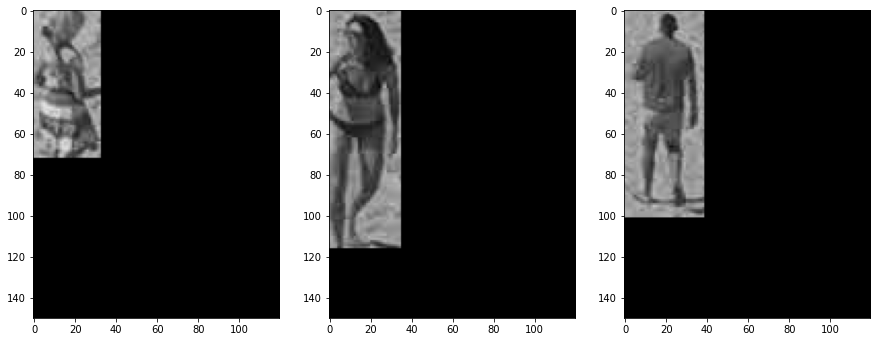

In [ ]:
display_image(patches, sub_plots=(1,3))

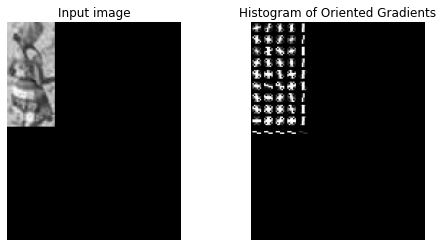

In [ ]:
image = patches[0]
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
hog_positive = []
hog_negative = []

for image in patches:
  hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm="L2", transform_sqrt=True, feature_vector=True)
  hog_positive.append(hog_image)
for image in patches_bg:
  hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm="L2", transform_sqrt=True, feature_vector=True)
  hog_negative.append(hog_image)

## Train SVM Classifier to detect people

In [ ]:
y = [1]*len(hog_positive)
y_neg = [0]*len(hog_negative)
y.extend(y_neg)

X = hog_positive
X.extend(hog_negative)

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score
X, y = shuffle(X, y, random_state = 0)

clf1 = svm.LinearSVC(C=0.01, max_iter=1000, class_weight='balanced', verbose = 1)
clf1.fit(X, y)

y_pred = clf1.predict(X)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y,y_pred)*100
confusion_mat = confusion_matrix(y,y_pred)

[LibLinear]

In [ ]:
accuracy

89.43298969072166

In [ ]:
confusion_mat

array([[244,  36],
       [  5, 103]])

Now that this model is trained, we can combine it with the results of our background subtraction to determine which detected boxes actually have humans